<h1>Another binomial example </h1>
<p>
Suppose you have a globe representing our planet, the Earth. This version of the world is small enough to hold in your hands. You are curious how much of the surface is covered in water. You adopt the following strategy: You will toss the globe up in the air. When you catch it, you will record whether or not the surface under your right index finger is water or land where W indicates water and L indicates land. So in this example you observe six W (water) observations and three L (land) observations. Call this sequence of observations the data.</p>
<p>
    
    WLWWWLWLW
    
    
To get the logic moving, we need to make assumptions, and these assumptions constitute the model. Designing a simple Bayesian model benefits from a design loop with three steps.</p>

<b>(1)</b> Data story: Motivate the model by narrating how the data might arise.

<b>(2)</b> Update: Educate your model by feeding it the data.

<b>(3)</b> Evaluate: All statistical models require supervision, leading possibly to model revision



<h1> (1) Data Story </h1>
<p> You can motivate your data story by trying to explain how each piece of data is born. This usually means describing aspects of the underlying reality as well as the sampling process. The data story in this case is simply a restatement of the sampling process:</p>

(1) The true proportion of water covering the globe is p.

(2) A single toss of the globe has a probability <b>p</b> of producing a water(W)observation.

It has a probability<b> 1 − p</b> of producing a land (L) observation.


(3) Each toss of the globe is independent of the others.
The data story is then translated into a formal probability model. 

This probability model is easy to build, because the construction process can be usefully broken down into a series of component decisions. 

 <h1>Bayesian updating </h1>. 
 <p>Our problem is one of using the evidence—the sequence of globe tosses—to decide among different possible proportions of water on the globe.  Each possible proportion may be more or less plausible, given the evidence. A Bayesian model begins with one set of plausibilities assigned to each of these possibilities. These are the prior plausibilities. Then it updates them in light of the data, to produce the posterior plausibilities. This updating process is a kind of learning, called Bayesian updating. </p>
 <b>
 For the sake of the example only, let’s program our Bayesian machine to initially assign the same plausibility to every proportion of water, every value of p. </b>
 
 

In [13]:
def posterior_grid_approx(grid_points=5, success=4, tosses=5):
    # define grid
    p_grid = np.linspace(0, 1, grid_points) # |..|..|..|..|

    # define prior
    prior = np.repeat(5, grid_points)  # uniform Repeat elements of an array.
    # prior = (p_grid >= 0.5).astype(int)  # truncated
    # prior = np.exp(- 5 * abs(p_grid - 0.5))  # double exp

    # compute likelihood at each point in the grid
    likelihood = stats.binom.pmf(success, tosses, p_grid)

    # compute product of likelihood and prior
    unstd_posterior = likelihood * prior

    # standardize the posterior, so it sums to 1
    posterior = unstd_posterior / unstd_posterior.sum()
    return p_grid, posterior 

    

In [1]:
%matplotlib inline

In [14]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np

import scipy.stats as stats

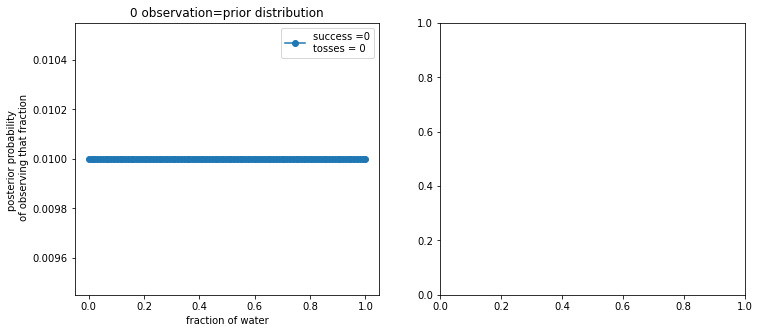

In [5]:

#(grid_points=5, success=4, tosses=5):
_, ax = plt.subplots(1, 2, figsize=(12, 5))

# just firt observation 
idx=0      
p_grid, posterior = posterior_grid_approx(100, 0, 0) #prior distribution
ax[idx].plot(p_grid, posterior, "o-", label=f"success =0\ntosses = 0")
ax[idx].set_xlabel("fraction of water")
ax[idx].set_ylabel("posterior probability \n of observing that fraction")
ax[idx].set_title("0 observation=prior distribution")
ax[idx].legend(loc=0)


In [10]:
import pandas as pd
import numpy as np
def panda_posterior_grid_approx(grid_points=5, success=4, tosses=5):
    # define grid
    p_grid = np.linspace(0, 1, grid_points) # |..|..|..|..|

    # define prior
    prior = np.repeat(5, grid_points)  # uniform Repeat elements of an array.
    # prior = (p_grid >= 0.5).astype(int)  # truncated
    # prior = np.exp(- 5 * abs(p_grid - 0.5))  # double exp

    # compute likelihood at each point in the grid
    likelihood = stats.binom.pmf(success, tosses, p_grid)

    # compute product of likelihood and prior
    unstd_posterior = likelihood * prior

    # standardize the posterior, so it sums to 1
    posterior = unstd_posterior / unstd_posterior.sum()
    df=pd.DataFrame();
    df["posterior"]=posterior
    df["grid"]=p_grid
    return df
   

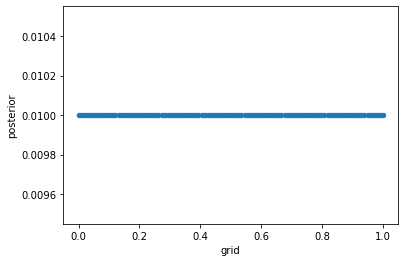

In [11]:
Nodataframe=panda_posterior_grid_approx(100,0,0)# what model thinks before seeing data= prior distribution
Nodataframe.plot( "grid", "posterior",kind='scatter');

<AxesSubplot:xlabel='grid', ylabel='posterior'>

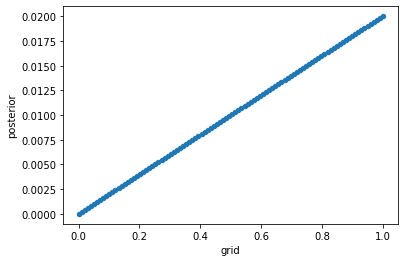

In [5]:
Nodataframe=panda_posterior_grid_approx(100,1,1)# one w is observed  WLWWWLWLW
Nodataframe.plot( "grid", "posterior",kind='scatter')

<AxesSubplot:xlabel='grid', ylabel='posterior'>

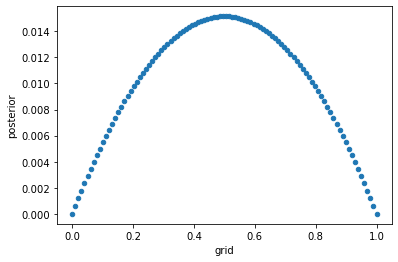

In [8]:
Nodataframe=panda_posterior_grid_approx(100,1,2)# one w is observed  WL WWWLWLW
Nodataframe.plot( "grid", "posterior",kind='scatter')

<AxesSubplot:xlabel='grid', ylabel='posterior'>

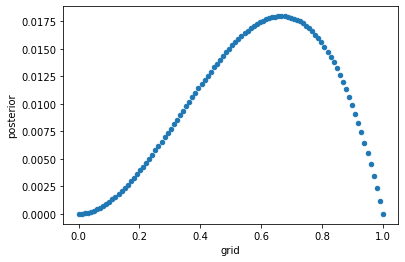

In [10]:
Nodataframe=panda_posterior_grid_approx(100,2,3)# 2 w is observed  WLWWWLWLW
Nodataframe.plot( "grid", "posterior",kind='scatter')

<AxesSubplot:xlabel='grid', ylabel='posterior'>

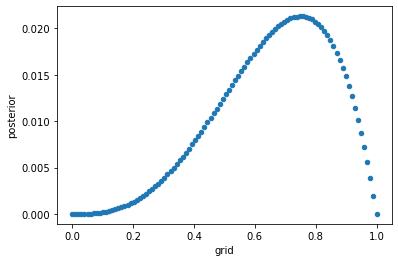

In [11]:
Nodataframe=panda_posterior_grid_approx(100,3,4)# one w is observed
Nodataframe.plot( "grid", "posterior",kind='scatter')

<AxesSubplot:xlabel='grid', ylabel='posterior'>

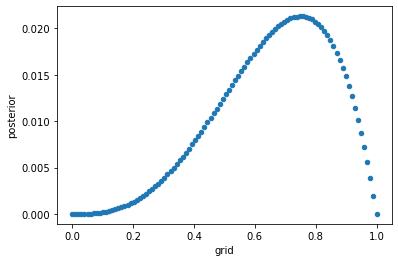

In [12]:
Nodataframe=panda_posterior_grid_approx(100,3,4)# one w is observed
Nodataframe.plot( "grid", "posterior",kind='scatter')

<AxesSubplot:xlabel='grid', ylabel='posterior'>

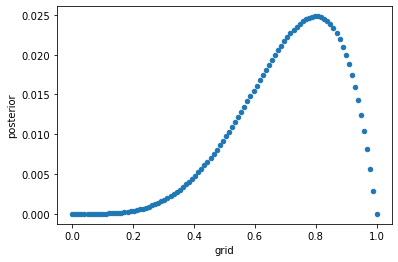

In [15]:
Nodataframe=panda_posterior_grid_approx(100,4,5)# one w is observed  WLWWW LWLW
Nodataframe.plot( "grid", "posterior",kind='scatter')

<AxesSubplot:xlabel='grid', ylabel='posterior'>

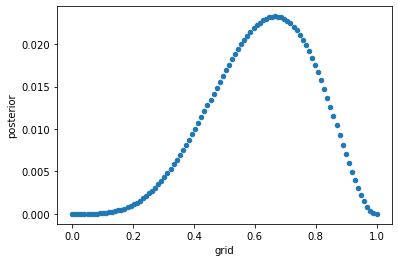

In [13]:
Nodataframe=panda_posterior_grid_approx(100,4,6)# one w is observed
Nodataframe.plot( "grid", "posterior",kind='scatter')

<AxesSubplot:xlabel='grid', ylabel='posterior'>

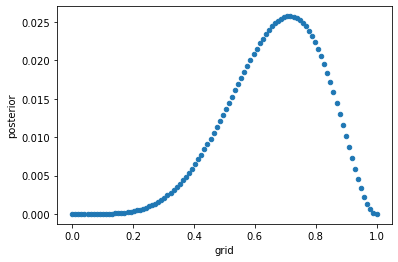

In [17]:
Nodataframe=panda_posterior_grid_approx(100,5,7)# one w is observed
Nodataframe.plot( "grid", "posterior",kind='scatter')

<AxesSubplot:xlabel='grid', ylabel='posterior'>

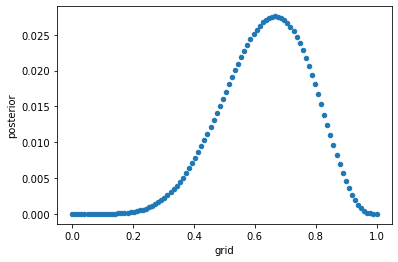

In [14]:
Nodataframe=panda_posterior_grid_approx(100,6,9)# one w is observed
Nodataframe.plot( "grid", "posterior",kind='scatter')

repeat for the  sequence WLWWWLWLW

<b> Prior as probability distribution</b>. You could write the prior in the example here as: Pr(p)= 1 =1/1−0
The prior is a probability distribution for the parameter.

In general, for a uniform prior from a to b, the
probability of any point in the interval is 1/(b − a).
If you’re bothered by the fact that the probability of every value of p is 1, remember that every probability distribution must sum (integrate) to 1. The expression 1/(b − a) ensures that the area under the flat line from a to b is equal to 1. 

<h1>The Model </h1>
With all the above work, we can now summarize out model. The observed variables W and L are given relative counts through the binomial distribution. So we can write, as a shortcut:

W ∼ Binomial(N, p)

where N = W + L. The above is just a convention for communicating the assumption that the relative counts of ways to realize W in N trials with probability p on each trial comes from the binomial distribution. And the unobserved parameter p similarly gets:

p ∼ Uniform(0, 1)

This means that p has a uniform—flat—prior over its entire possible range, from zero to one. As I mentioned earlier, this is obviously not the best we could do, since we know the Earth has more water than land, even if we do not know the exact proportion yet.

<h1> sampling the posterior</h1>
<p>The posterior distribution is a probability distribution. And like all probability distributions, we can imagine drawing samples from it. The sampled events in this case are parameter values. Most parameters have no exact empirical realization. </p>

<h1> Working with samples</h1>
Working with samples transforms a problem in calculus into a problem in data summary, into a frequency format problem. An integral in a typical Bayesian context is just the total probability in some interval. That can be a challenging calculus problem. But once you have samples from the probability distribution, it’s just a matter of counting values in the interval. Even seemingly simple calculations, like confidence intervals, are made difficult once a model has many parameters. In those cases, one must average over the uncertainty in all other parameters, when describing the uncertainty in a focal parameter. This requires a complicated integral, but only a very simple data summary. An empirical attack on the posterior allows the scientist to ask and answer more questions about the model, without relying upon a captive mathematician. For this reason, it is often easier and more intuitive to work with samples from the posterior, than to work with probabilities and integrals directly. 






Surprisingly, a strong minority current of modern statistical theory offers the possibility of avoiding both the <b>magic and assumptions of </b>classical statistical theory through randomization techniques known collectively as resampling.  <p>These techniques take a given sample and either create new sam- ples by randomly selecting values from the given sample with <b>replacement</b>, or by randomly shuffling labels on the data.

<p>Now we wish to draw 10,000 samples from this posterior. 
    
    Imagine the posterior is a bucket full of parameter values, numbers such as 0.1, 0.7, 0.5, 1, etc. 
    
    Within the bucket, each value exists in proportion to its posterior probability, such that values near the peak are much more common than those in the tails. 
    
    We’re going to scoop out 10,000 values from the bucket. 
    
    Provided the bucket is well mixed, the resulting samples will have the same proportions as the exact posterior density. 
    
    Therefore the individual values of p will appear in our samples in proportion to the posterior plausibility of each value.</p>

In [15]:
p_grid, posterior = posterior_grid_approx(grid_points=100, success=6, tosses=9)


samples = np.random.choice(p_grid, p=posterior, size=int(1e4), replace=True)
samples

array([0.64646465, 0.64646465, 0.4040404 , ..., 0.87878788, 0.43434343,
       0.4040404 ])

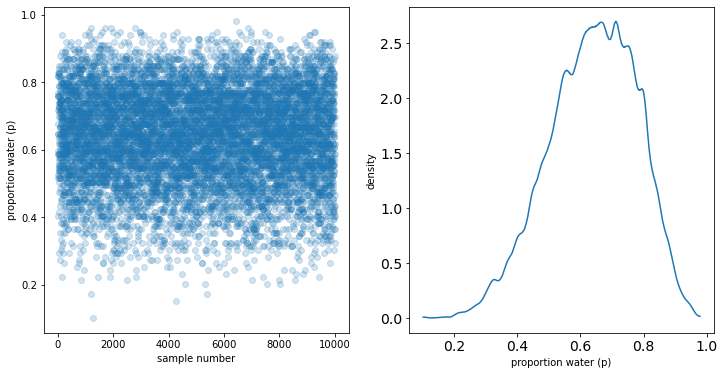

In [16]:

_, (ax0, ax1) = plt.subplots(1, 2, figsize=(12, 6))
ax0.plot(samples, "o", alpha=0.2)
ax0.set_xlabel("sample number")
ax0.set_ylabel("proportion water (p)")
az.plot_kde(samples, ax=ax1)# very fine histogram
ax1.set_xlabel("proportion water (p)")
ax1.set_ylabel("density");

<p>You can see that the estimated density is very similar to ideal posterior you computed via grid approximation. If you draw even more samples, maybe 1e5 or 1e6, the density estimate will get more and more similar to the ideal.
</p>
<p>
All you’ve done so far is crudely replicate the posterior density you had already com- puted. That isn’t of much value. But next it is time to use these samples to describe and understand the posterior. That is of great value.</p>


<h1>Sampling to summarize </h1>
<p>
Once your model produces a posterior distribution, the model’s work is done. But your work has just begun. It is necessary to summarize and interpret the posterior distribution. Exactly how it is summarized depends upon your purpose. But common questions include:</p>

• How much posterior probability lies below some parameter value?

• How much posterior probability lies between two parameter values?

• Which parameter value marks the lower 5% of the posterior probability?

• Which range of parameter values contains 90% of the posterior probability? 

• Which parameter value has highest posterior probability?
<p>
These simple questions can be usefully divided into questions about (1) intervals of defined boundaries, (2) questions about intervals of defined probability mass, and (3) questions about point estimates. We’ll see how to approach these questions using samples from the posterior.</p>

<h1> Intervals of defined boundaries </h1>. Suppose I ask you for the posterior probability that the proportion of water is less than 0.5. Using the grid-approximate posterior, you can just add up all of the probabilities, where the corresponding parameter value is less than 0.5:

In [27]:
sum(posterior[p_grid < 0.5])

0.17183313110747478

So about 17% of the posterior probability is below 0.5

<p>
So let’s see how to perform the same calculation, using samples from the posterior. This approach does generalize to complex models with many parameters, and so you can use it everywhere. All you have to do is similarly 
    
    add up all of the samples below 0.5, 
    
    but also divide the resulting count by the total number of samples. I
    
    In other words, find the frequency of parameter values below 0.5:</p>

In [23]:
sum(samples < 0.5) / 1e4

0.1735

<h1> how much posterior probability lies between 0.5 and 0.75:<h1>

In [18]:
sum((samples > 0.5) & (samples < 0.75)) / 1e4

0.61

So about 61% of the posterior probability lies between 0.5 and 0.7

<h1>Intervals of defined mass.</h1> It is more common to see scientific journals reporting an interval of defined mass, usually known as a confidence interval.
An interval of posterior probability, such as the ones we are working with, may instead be called a credible interval.


We’re going to call it a compatibility interval instead, in order to avoid the unwarranted implications of “confidence” and “credibility. What the interval indicates is a range of parameter values compatible with the model and data. The model and data themselves may not inspire confidence, in which case the interval will not either.


These posterior intervals report two parameter values that contain between them a specified amount of posterior probability, a probability mass. For this type of interval, it is easier to find the answer by using samples from the posterior than by using a grid approximation.

Suppose for example you want to know the boundaries of the lower 80% posterior probabil- ity. You know this interval starts at p = 0. To find out where it stops, think of the samples as data and ask where the 80th percentile lies:

In [22]:
np.percentile(samples, 80)

0.7575757575757577

The middle 80% interval lies between the 10th percentile and the 90th percentile. These boundaries are found using the same approach:

In [20]:
np.percentile(samples, [10, 90])

array([0.45454545, 0.80808081])

In [23]:
az.hpd(samples, credible_interval=0.5)

/Users/gokhansahin/opt/anaconda3/envs/MCelreath-pymc3/lib/python3.8/site-packages/arviz/stats/stats.py:334: UserWarning: hpd will be deprecated Please replace hdi
  warnings.warn(


array([0.38383838, 0.88888889])

Intervals of this sort, which assign equal probability mass to each tail, are very common
in the scientific literature. We’ll call them <b>percentile intervals </b>(PI). These intervals do a good job of communicating the shape of a distribution, as long as the distribution <b>isn’t  too asymmetrical</b>. But in terms of supporting inferences about which parameters are consistent with the data, they are not perfect.

Consider the posterior distribution where you  observe three waters in three tosses and a uniform (flat) prior. It is highly skewed, having its maximum value at the boundary, p = 1. You can compute it, via grid approximation, with:

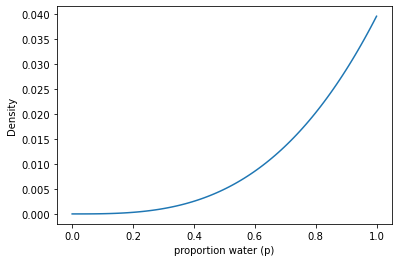

In [24]:
p_grid, posterior = posterior_grid_approx(grid_points=100,success=3, tosses=3)
plt.plot(p_grid, posterior)
plt.xlabel("proportion water (p)")
plt.ylabel("Density");

The 50 % interval

In [25]:
samples = np.random.choice(p_grid, p=posterior, size=int(1e4), replace=True)
np.percentile(samples, [25, 75])

array([0.70707071, 0.92929293])

This interval assigns 25% of the probability mass above and below the interval. So it pro- vides the central 50% probability. But in this example, it ends up excluding the most prob- able parameter values, near p = 1. So in terms of describing the shape of the posterior distribution—which is really all these intervals are asked to do—the percentile interval can be misleading.


probability mass. If you think about it, there must be an infinite number of posterior intervals with the same mass. But if you want an interval that best represents the parameter values most consistent with the data, then you want the densest of these intervals. That’s what the HPDI is:  <b>highest posterior density interval</b>

In [26]:
az.hpd(samples, credible_interval=0.5)

/Users/gokhansahin/opt/anaconda3/envs/MCelreath-pymc3/lib/python3.8/site-packages/arviz/stats/stats.py:334: UserWarning: hpd will be deprecated Please replace hdi
  warnings.warn(


array([0.49494949, 1.        ])

The HPDI also has some disadvantages. HPDI is more computationally intensive than PI and suffers from greater simulation variance, which is a fancy way of saying that it is sensitive to how many samples you draw from the posterior. It is also harder to understand and many scientific audiences will not appreciate its features, while they will immediately understand a percentile interval, as ordinary non-Bayesian intervals are typically interpreted (incorrectly) as percentile intervals 




Overall, if the choice of interval type makes a big difference, then you shouldn’t be using intervals to summarize the posterior. Remember, the entire posterior distribution is the Bayesian “estimate.” It summarizes the relative plausibilities of each possible value of the parameter. Intervals of the distribution are just helpful for summarizing it. If choice of in- terval leads to different inferences, then you’d be better off just plotting the entire posterior distribution.

<h1>Point estimates</h1>. 
<h2>a maximum a posteriori (MAP) estimate </h2>
The third and final common summary task for the posterior is to produce point estimates of some kind. Given the entire posterior distribution, what value should you report? This seems like an innocent question, but it is difficult to answer. The Bayesian parameter estimate is precisely the entire posterior distribution, which is not a sin- gle number, but instead a function that maps each unique parameter value onto a plausibility value. So really the most important thing to note is that you don’t have to choose a point es- timate. It’s hardly ever necessary and often harmful. It discards information.
But if you must produce a single point to summarize the posterior, you’ll have to ask and answer more questions. Consider the following example. Suppose again the globe tossing experiment in which we observe 3 waters out of 3 tosses;
Let’s consider three alternative point estimates. First, it is very common for scientists to report the parameter value with highest posterior probability, <b> a maximum a posteriori (MAP) estimate </b>. You can easily compute the MAP in this example (x)from grid appro:



In [27]:
p_grid[posterior == max(posterior)]

array([1.])

Or if you instead have <b>samples from the posterior </b>, you can still approximate the same point:

In [28]:
stats.mode(samples)[0]

array([1.])

<h2> posterior mean and median </h2>

In [43]:
np.mean(samples), np.median(samples)# sampling from distrbution with replace and shuffle 

(0.8018868686868688, 0.8383838383838385)

These are also point estimates, and they also summarize the posterior. But all three—the mode (MAP), mean, and median—are different in this case.How can we choose among them?

One principled way to go beyond using the entire posterior as the estimate is to choose a loss function. A loss function is a rule that tells you the cost associated with using any particular point estimate. While statisticians and game theorists have long been interested in loss functions, and how Bayesian inference supports them, scientists hardly ever use them explicitly. The key insight is that different loss functions imply different point estimates.




Here’s an example to help us work through the procedure. Suppose I offer you a bet. Tell me which value of p, the proportion of water on the Earth, you think is correct. I will pay you \$100, if you get it exactly right. But I will subtract money from your gain, proportional to the distance of your decision from the correct value. Precisely, your loss is proportional to the absolute value of d − p, where d is your decision and p is the correct answer. We could change the precise dollar values involved, without changing the important aspects of this problem. What matters is that the loss is proportional to the distance of your decision from the true value.


Now once you have the posterior distribution in hand, how should you use it to maxi-
mize your expected winnings? It turns out that the parameter value that maximizes expected
winnings (minimizes expected loss) is the median of the posterior distribution. Let’s calcu-
late that fact, without using a mathematical proof. 

Calculating expected loss for any given decision means avereaging over our uncertainty in the true value. Of course we don’t know the true value, in most cases. But if we are going to use our model’s information about the parameter, that means using the entire posterior distribution. So suppose we decide p = 0.5 will be our decision. Then the expected loss will be:

In [29]:
sum( posterior*abs( 0.5 - p_grid ) )

0.31626874808692995

The symbols posterior and p_grid are the same ones we’ve been using throughout this chapter, containing the posterior probabilities and the parameter values, respectively. All the code above does is compute the weighted average loss, where each loss is weighted by its corresponding posterior probability There’s a trick for repeating this calculation for every possible decision,

In [39]:
p_grid

array([0.        , 0.01010101, 0.02020202, 0.03030303, 0.04040404,
       0.05050505, 0.06060606, 0.07070707, 0.08080808, 0.09090909,
       0.1010101 , 0.11111111, 0.12121212, 0.13131313, 0.14141414,
       0.15151515, 0.16161616, 0.17171717, 0.18181818, 0.19191919,
       0.2020202 , 0.21212121, 0.22222222, 0.23232323, 0.24242424,
       0.25252525, 0.26262626, 0.27272727, 0.28282828, 0.29292929,
       0.3030303 , 0.31313131, 0.32323232, 0.33333333, 0.34343434,
       0.35353535, 0.36363636, 0.37373737, 0.38383838, 0.39393939,
       0.4040404 , 0.41414141, 0.42424242, 0.43434343, 0.44444444,
       0.45454545, 0.46464646, 0.47474747, 0.48484848, 0.49494949,
       0.50505051, 0.51515152, 0.52525253, 0.53535354, 0.54545455,
       0.55555556, 0.56565657, 0.57575758, 0.58585859, 0.5959596 ,
       0.60606061, 0.61616162, 0.62626263, 0.63636364, 0.64646465,
       0.65656566, 0.66666667, 0.67676768, 0.68686869, 0.6969697 ,
       0.70707071, 0.71717172, 0.72727273, 0.73737374, 0.74747

In [30]:
loss = [sum(posterior * abs(p - p_grid)) for p in p_grid]
p_grid[loss == min(loss)]

array([0.84848485])

So what are we to learn from all of this? In order to decide upon a point estimate, a single-value summary of the posterior distribution, we need to pick a loss function. Different loss functions nominate different point estimates. The two most common examples are the absolute loss as above, which leads to the median as the point estimate, and the quadratic loss (d − p)2, which leads to the posterior mean (mean(samples)) as the point estimate. When the posterior distribution is symmetrical and normal-looking, then the median and mean converge to the same point, which relaxes some anxiety we might have about choosing a loss function. For the original globe tossing data (6 waters in 9 tosses), for example, the mean and median are barely different.


In principle, though, the details of the applied context may demand a rather unique loss function. Consider a practical example like deciding whether or not to order an evacuation, based upon an estimate of hurricane wind speed. Damage to life and property increases very rapidly as wind speed increases. There are also costs to ordering an evacuation when none is needed, but these are much smaller. Therefore the implied loss function is highly asymmetric, rising sharply as true wind speed exceeds our guess, but rising only slowly as true wind speed falls below our guess. In this context, the optimal point estimate would tend to be larger than posterior mean or median. Moreover, the real issue is whether or not to order an evacuation, and so producing a point estimate of wind speed may not be necessary at all.

<h1> sampling to simulate prediction</h1>


Another common job for samples is to ease simulation of the model’s implied obser- vations. Generating implied observations from a model is useful for at least four distinct reasons.

(1) Model design. We can sample not only from the posterior, but also from the prior. Seeing what the model expects, before the data arrive, is the best way to understand the implications of the prior. We’ll do a lot of this in later chapters, where there will be multiple parameters and so their joint implications are not always very clear.

(2) Model checking. After a model is updated using data, it is worth simulating im- plied observations, to check both whether the fit worked correctly and to investi- gate model behavior.

(3) Software validation. In order to be sure that our model fitting software is working, it helps to simulate observations under a known model and then attempt to recover the values of the parameters the data were simulated under.

(4) Research design. If you can simulate observations from your hypothesis, then you can evaluate whether the research design can be effective. In a narrow sense, this means doing power analysis, but the possibilities are much broader.

(5) Forecasting. Estimates can be used to simulate new predictions, for new cases and future observations. These forecasts can be useful as applied prediction, but also for model criticism and revision.

Let’s summarize the globe tossing model that you’ve been working with for two chapters now. A fixed true proportion of water p exists, and that is the target of our inference. Tossing the globe in the air and catching it produces observations of “water” and “land” that appear in proportion to p and 1 − p, respectively.

Now note that these assumptions not only allow us to infer the plausibility of each possi- ble value of p, after observation. That’s what you did in the previous chapter. These assump- tions also allow us to simulate the observations that the model implies. They allow this, because likelihood functions work in both directions. Given a realized observation, 

the like- lihood function says how plausible the observation is. 

And given only the parameters, 

the likelihood defines a distribution of possible observations that we can sample from, to simu-late observation. 

In this way, Bayesian models are always generative, capable of simulating predictions. Many non-Bayesian models are also generative, but many are not.
We will call such simulated data dummy data, to indicate that it is a stand-in for actual data. With the globe tossing model, the dummy data arises from a binomial likelihood:
Pr(W|N, p) =( N! /W!(N − W)!)  p^W (1 − p)^N−W 


here W is an observed count of “water” and N is the number of tosses. Suppose N = 2, two tosses of the globe. Then there are only three possible observations: 0 water, 1 water, 2 water. You can quickly compute the probability of each, for any given value of p. Let’s use p = 0.7, which is just about the true proportion of water on the Earth:

In [41]:
stats.binom.pmf(range(3), n=2, p=0.7)

array([0.09, 0.42, 0.49])

This means that there’s a 9% chance of observing w = 0, a 42% chance of w = 1, and a 49% chance of w = 2. If you change the value of p, you’ll get a different distribution of implied observations.
Now we’re going to simulate observations, using these probabilities. This is done by sampling from the distribution just described above.


You could use resampling to do this, but phyton  provides convenient sampling functions for all the ordinary probability distributions, like the binomial. So a single dummy data observation of W can be sampled with:

In [31]:
stats.binom.rvs(n=2, p=0.7, size=1)  #we make one experiment of two throws

array([2])

In [48]:
stats.binom.rvs(n=2, p=0.7, size=10) #A set of 10 simulations of 2 throws

array([2, 2, 1, 1, 2, 1, 2, 1, 2, 2])

Let’s generate 100,000 dummy observations, just to verify that each value (0, 1, or 2) appears in proportion to its likelihood:

In [32]:
dummy_w = stats.binom.rvs(n=2, p=0.7, size=int(1e5))
[(dummy_w == i).mean() for i in range(3)] #

[0.08966, 0.41803, 0.49231]

<h1> Estimating The posterior predictive distribution</h1>

 Given a realized observation, the likelihood function says how plausible the observation is: 

stats.binom.pmf(success=6, tosses=9, p_grid=0.7)->prob. of observing 6 heads in 9 tosses
 
 And given only the parameters, the likelihood defines a distribution of possible observations that we can sample from, to simulate observation. 
 
 stats.binom.rvs(n=9, p=0.7, size=int(1e5))-> make 9 tosses with probability 0.7 1e5 times,return the outcomes in an array. 
 


<p> We need to combine sampling of simulated observations with sampling parameters from the posterior distribution. </p>

Predictive posterior distribution  is the prob. Dist over some new data ($${X}_{n}$$) given that we have observed some data X
$$P({X}_{n}| X)$$
WE can aproximate predictive posterior distribution  in two steps using sampling:
	1) Obtain a parameter value ${\theta}_{i}$, the fraction of water in our case,  by sampling  from our posterior distribution. 
	$${\theta}_{i} \propto p({\theta}_{i}|X)$$
    
    
    samples = np.random.choice(p_grid, p=posterior, size=int(1e4), replace=True): create 1e4 samples from 
    ${\theta}_{i}$  ie fraction of water values.
    
    
  2)  use that ${\theta}_{i}$, plug in that into our sampling distribution: $${X}_{n} \propto  p ( {X}_{n}|{\theta}_{i})$$
  
  
Repeat for i to many draw histogram ->posterior predictive dist

stats.binom.rvs(n=9, p=0.7, size=int(1e2))]->create 100 simulations for 9 tosses with 0.7 probability


In [18]:
p_grid, posterior = posterior_grid_approx(grid_points=10000, success=6, tosses=9)


samples = np.random.choice(p_grid, p=posterior, size=int(1e4), replace=True)

# WE HAVE CREATED  NEW SAMPLES  FROM POSTERIOR DİSTRİBUTİON BY SAMPLİNG-> WHAT WE
#GET İS P VALUES ([0,1]) PROPORTİONAL TO THEİR POSTERİOR PROBABILTY
#
ls=list()
for i in samples:
    ls.append([i,stats.binom.rvs(n=9, p=i, size=int(1e2))])

dummy=np.empty([0])
for [p,l] in ls: 
    dummy=np.append(dummy,l)# flatten array

dummy


array([3., 5., 4., ..., 7., 7., 8.])

In [19]:
import  pandas as pd
dfsim=pd.DataFrame();
dfsim["sims"]=dummy

array([[<AxesSubplot:title={'center':'sims'}>]], dtype=object)

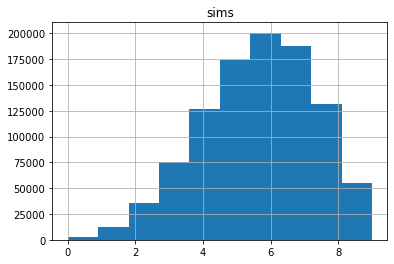

In [21]:
dfsim.hist()


In [22]:
dfsim.describe()

,sims
count,1000000.000000
mean,5.742920
std,1.858882
min,0.000000
25%,4.000000
50%,6.000000
75%,7.000000
max,9.000000


The simulated model predictions are quite consistent with the observed data in this case—the actual count of 6 lies right in the middle of the simulated distribution.


In [39]:
az.hpd(dummy, credible_interval=0.5)

array([3., 9.])

In [40]:
stats.mode(dummy)[0]

array([6.])

In [41]:
np.mean(dummy), np.median(dummy)

(5.71643, 6.0)

 <h2>EXample </h2>
 Suppose you want to estimate the Earth's proportion of water very precisely. Specifically, you want the 99% percentile interval of the posterior distribution of p to be only 0.05 wide. This means the distance between the upper and lower bound of the interval should be 0.05. How many times will you have to toss the globe to do this?

In [19]:
import pandas as pd
p=0.7
for n in [20, 50, 100, 200, 500, 1000, 2000, 3000, 5000]:
    k=sum(np.random.binomial(1, p,n))  # grid aproxx
    p_grid = np.linspace(0,1,1001)
    prob_p = np.ones(1001)
    prob_data = stats.binom.pmf(k, n, p=p_grid) #prob of observing k ones in n trials for all the p vals in the grid
    posterior3 = prob_data * prob_p
    posterior3 = posterior3 / sum(posterior3)
    samples = pd.DataFrame(np.random.choice(p_grid, 5000, p=posterior3))\
                .reset_index()\
                .rename({0:'prob'}, axis=1)
    result=np.percentile(samples.prob, [0.5, 99.5])
    print(f'Distribution size: {n}, PI0.5&99.5: {result}, difference={result[1]-result[0]}')

Distribution size: 20, PI0.5&99.5: [0.339995 0.831   ], difference=0.491005
Distribution size: 50, PI0.5&99.5: [0.548    0.872005], difference=0.3240050000000001
Distribution size: 100, PI0.5&99.5: [0.540995 0.779   ], difference=0.23800500000000002
Distribution size: 200, PI0.5&99.5: [0.66499 0.821  ], difference=0.1560100000000001
Distribution size: 500, PI0.5&99.5: [0.628995 0.737005], difference=0.10801000000000016
Distribution size: 1000, PI0.5&99.5: [0.667    0.738005], difference=0.07100499999999998
Distribution size: 2000, PI0.5&99.5: [0.674    0.726005], difference=0.05200500000000008
Distribution size: 3000, PI0.5&99.5: [0.669 0.713], difference=0.04399999999999993
Distribution size: 5000, PI0.5&99.5: [0.668 0.702], difference=0.03400000000000003


In [18]:
print (np.random.binomial(1, 0.7,50)) 

[1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 0 1 1 0 0 0 0 1 0 0 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [16]:
k

NameError: name 'k' is not defined